In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import CategoricalAccuracy
import tensorflow as tf





In [30]:
#df = pd.read_csv('AllWeather.csv', index_col='sno')
df = pd.read_csv('finals.csv', index_col='sno')
##To plot sample data
#print(df.head())
#df.plot(figsize=(10, 5))
#####
#print(df[:25])
df

,station name,station number,Date,Hour,Temp,dew point,humidity,precipitation,snow depth,wind direction,wind speed,peak wind gust,air pressure,one hour sunshine total(minutes),weather condition code
sno,,,,,,,,,,,,,,,
1,gulmarg,42026,01-01-2023,0,-2.9,-28.4,12,0.0,0,202,5.4,0,1021.2,0,3
2,gulmarg,42026,01-01-2023,1,-2.8,-26.7,14,0.0,0,204,5.4,0,1021.1,0,1
3,gulmarg,42026,01-01-2023,2,-2.8,-25.2,16,0.0,0,205,4.7,0,1021.3,0,1
4,gulmarg,42026,01-01-2023,3,-7.4,-10.7,77,0.0,0,0,0.0,0,981.5,0,1
5,gulmarg,42026,01-01-2023,4,-2.6,-24.4,17,0.0,0,204,4.7,0,1022.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315356,bhubaneswar,42971,31-12-2023,19,17.0,15.0,88,0.0,0,0,0.0,0,1017.0,0,5
315357,bhubaneswar,42971,31-12-2023,20,16.0,15.0,94,0.0,0,280,3.6,0,1016.0,0,5
315358,bhubaneswar,42971,31-12-2023,21,18.0,16.7,92,0.0,0,0,0.0,0,1015.5,0,5


<Axes: xlabel='sno'>

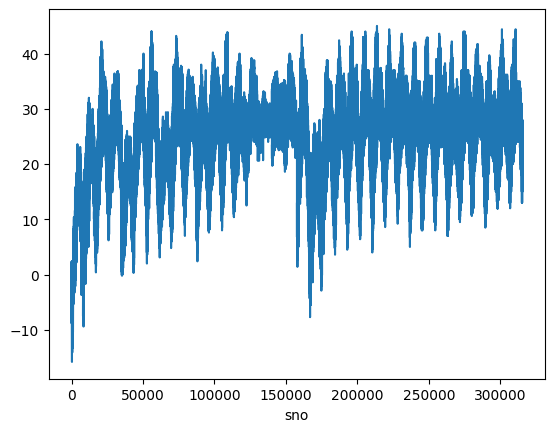

In [31]:
#Plotting Temp Values
temp = df['Temp']
temp.plot()
#plt.show()
#######

#[[[1],[2],[3],[4],[5]]] [6] we give 1 to 5 hours and we get 6th hour value
# [[2,3,4,5,6]] [7] we give 2 to 6 hours and we get 7th hour value
# [[3,4,5,6,7]] [8] we give 3 to 7 hours and we get 8th hour value 
#We predict the next value based on the previous 5 values

#Supervoised learning



In [53]:
def dt_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
X, y = dt_to_X_y(temp, window_size=WINDOW_SIZE)
print(X.shape, y.shape)
#print(X[:5])
#print(y[:5])
print(len(X)*.8, len(y)*.1)
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_val, y_val = X[int(len(X)*0.8):int(len(X)*0.9)], y[int(len(y)*0.8):int(len(y)*0.9)]
X_test, y_test = X[int(len(X)*0.9):], y[int(len(y)*0.9):]

#Print all shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 
print(X_test.shape, y_test.shape)
#All  shape printed




(315348, 12, 1) (315348,)
252278.40000000002 31534.800000000003
(252278, 12, 1) (252278,)
(31535, 12, 1) (31535,)
(31535, 12, 1) (31535,)


In [ ]:

###MOdel

model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

#Model Cleckpoint

cp = ModelCheckpoint('modellstm/', save_best_only=True)

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

history = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[cp])

#history = model1.fit(X_train, y_train, epochs=10, batch_size=32,  callbacks=[cp])

score = model1.evaluate(X_test, y_test)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dense_38 (Dense)            (None, 8)                 520       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
7884/7884 [==============================] - ETA: 0s - loss: 6.4662 - root_mean_squared_error: 2.5429

INFO:tensorflow:Assets written to: modellstm\assets


INFO:tensorflow:Assets written to: modellstm\assets


7884/7884 [==============================] - 292s 37ms/step - loss: 6.4662 - root_mean_squared_error: 2.5429 - val_loss: 1.8580 - val_root_mean_squared_error: 1.3631
Epoch 2/3
7883/7884 [============================>.] - ETA: 0s - loss: 1.8721 - root_mean_squared_error: 1.3682

INFO:tensorflow:Assets written to: modellstm\assets


INFO:tensorflow:Assets written to: modellstm\assets


7884/7884 [==============================] - 333s 42ms/step - loss: 1.8721 - root_mean_squared_error: 1.3682 - val_loss: 1.7577 - val_root_mean_squared_error: 1.3258
Epoch 3/3
986/986 [==============================] - 14s 14ms/step - loss: 1.4866 - root_mean_squared_error: 1.2192


Test Score=  1.4865589141845703
Test Accuracy=  1.219245195388794
7884/7884 [==============================] - 114s 14ms/step
        Train Prediction  Actuals
0              -2.825179     -6.4
1              -5.437703     -4.2
2              -4.637408     -4.1
3              -3.649790     -4.0
4              -3.292943     -4.0
...                  ...      ...
252273         20.411890     20.1
252274         20.181082     20.2
252275         20.281393     20.0
252276         20.549603     19.4
252277         19.996492     20.3

[252278 rows x 2 columns]


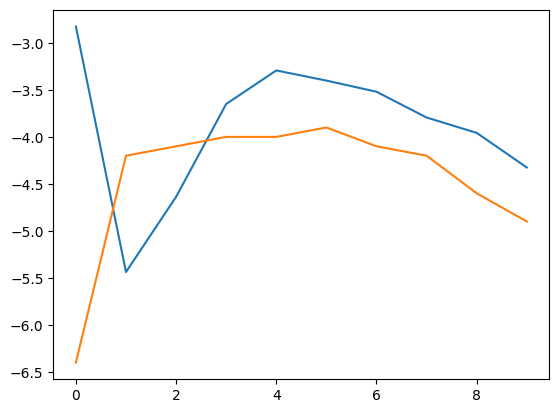

In [104]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model1 = load_model('modellstm/')

train_prdictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:10])
plt.plot(train_results['Actuals'][:10]) 
plt.show()

In [109]:

model2 = Sequential()
model2.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model2.add(Conv1D(64, kernel_size=3))
model2.add(Flatten()) 
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()

#Model Cleckpoint

cp1 = ModelCheckpoint('convmodel/', save_best_only=True)

model2.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

history = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[cp1])

#history = model1.fit(X_train, y_train, epochs=10, batch_size=32,  callbacks=[cp])

score = model2.evaluate(X_test, y_test)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 10, 64)            256       
                                                                 
 flatten_6 (Flatten)         (None, 640)               0         
                                                                 
 dense_40 (Dense)            (None, 8)                 5128      
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,393
Trainable params: 5,393
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7884/7884 [==============================] - ETA: 0s - loss: 3.5403 - root_mean_squared_error: 1.8816

INFO:tensorflow:Assets written to: convmodel\assets


INFO:tensorflow:Assets written to: convmodel\assets


7884/7884 [==============================] - 53s 7ms/step - loss: 3.5403 - root_mean_squared_error: 1.8816 - val_loss: 2.4081 - val_root_mean_squared_error: 1.5518
Epoch 2/10
7882/7884 [============================>.] - ETA: 0s - loss: 2.1343 - root_mean_squared_error: 1.4609

INFO:tensorflow:Assets written to: convmodel\assets


INFO:tensorflow:Assets written to: convmodel\assets


7884/7884 [==============================] - 48s 6ms/step - loss: 2.1343 - root_mean_squared_error: 1.4609 - val_loss: 2.0097 - val_root_mean_squared_error: 1.4177
Epoch 3/10
7884/7884 [==============================] - 54s 7ms/step - loss: 2.0053 - root_mean_squared_error: 1.4161 - val_loss: 2.1248 - val_root_mean_squared_error: 1.4577
Epoch 4/10
7881/7884 [============================>.] - ETA: 0s - loss: 1.9660 - root_mean_squared_error: 1.4021

INFO:tensorflow:Assets written to: convmodel\assets


INFO:tensorflow:Assets written to: convmodel\assets


7884/7884 [==============================] - 57s 7ms/step - loss: 1.9661 - root_mean_squared_error: 1.4022 - val_loss: 1.9766 - val_root_mean_squared_error: 1.4059
Epoch 5/10
7884/7884 [==============================] - 56s 7ms/step - loss: 1.9481 - root_mean_squared_error: 1.3957 - val_loss: 2.0292 - val_root_mean_squared_error: 1.4245
Epoch 6/10
7883/7884 [============================>.] - ETA: 0s - loss: 1.9379 - root_mean_squared_error: 1.3921

INFO:tensorflow:Assets written to: convmodel\assets


INFO:tensorflow:Assets written to: convmodel\assets


7884/7884 [==============================] - 57s 7ms/step - loss: 1.9378 - root_mean_squared_error: 1.3920 - val_loss: 1.9227 - val_root_mean_squared_error: 1.3866
Epoch 7/10
7884/7884 [==============================] - 55s 7ms/step - loss: 1.9295 - root_mean_squared_error: 1.3891 - val_loss: 2.1350 - val_root_mean_squared_error: 1.4612
Epoch 8/10
7884/7884 [==============================] - 56s 7ms/step - loss: 1.9262 - root_mean_squared_error: 1.3879 - val_loss: 1.9873 - val_root_mean_squared_error: 1.4097
Epoch 9/10
7883/7884 [============================>.] - ETA: 0s - loss: 1.9192 - root_mean_squared_error: 1.3853

INFO:tensorflow:Assets written to: convmodel\assets


INFO:tensorflow:Assets written to: convmodel\assets


7884/7884 [==============================] - 56s 7ms/step - loss: 1.9191 - root_mean_squared_error: 1.3853 - val_loss: 1.9155 - val_root_mean_squared_error: 1.3840
Epoch 10/10
986/986 [==============================] - 2s 2ms/step - loss: 1.6755 - root_mean_squared_error: 1.2944


In [93]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model2 = load_model('modelconv/')



Test Score=  1.5595296621322632
Test Accuracy=  1.2488112449645996


7884/7884 [==============================] - 19s 2ms/step
        Train Prediction  Actuals
0              -2.768828     -6.4
1              -5.331082     -4.2
2              -4.877604     -4.1
3              -4.967579     -4.0
4              -3.283567     -4.0
...                  ...      ...
252273         20.362226     20.1
252274         20.604767     20.2
252275         20.702002     20.0
252276         20.693100     19.4
252277         19.844280     20.3

[252278 rows x 2 columns]


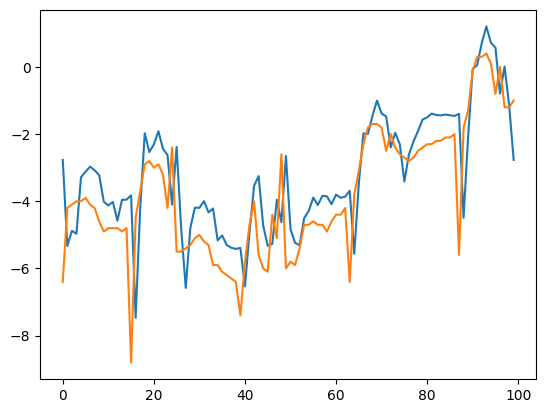

In [94]:
train_prdictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:100])
plt.plot(train_results['Actuals'][:100]) 
plt.show()

986/986 [==============================] - 2s 2ms/step
       Val Prediction  Actuals
0           20.576595     22.8
1           24.395542     22.0
2           24.081707     27.1
3           28.357252     28.2
4           29.274271     29.0
...               ...      ...
31530       29.463699     28.3
31531       28.746012     26.6
31532       27.084221     27.2
31533       28.236080     26.4
31534       25.578817     26.4

[31535 rows x 2 columns]


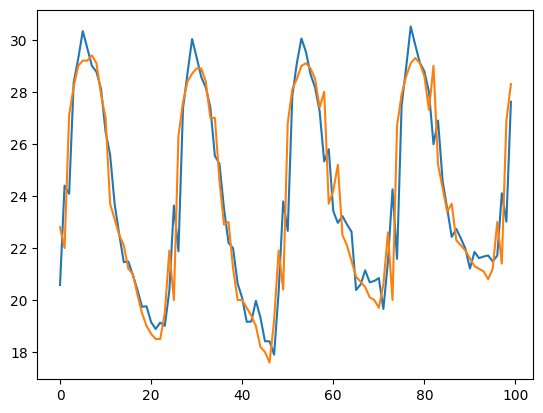

In [95]:
val_prdictions = model2.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Prediction': val_prdictions, 'Actuals': y_val})
print(val_results)
plt.plot(val_results['Val Prediction'][:100])
plt.plot(val_results['Actuals'][:100]) 
plt.show()

In [ ]:
X_testeed =[28,32,32,21,25,28,32,32,21,25,28,31] #12 Values
#X_testeed = np.array(X_test).reshape(1, 12, 1) #Reshape to 3D array
#prediction = model2.predict(X_testeed).flatten()
#print("Prediction: ", prediction) ##Print prediction value

ValueError: in user code:

    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Admin\anaconda3\envs\piflwr\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_17" (type Sequential).
    
    Input 0 of layer "conv1d_5" is incompatible with the layer: expected min_ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_17" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


986/986 [==============================] - 2s 2ms/step
       Test Prediction  Actuals
0            27.593935     27.3
1            27.825508     29.6
2            29.882864     30.2
3            31.522093     33.3
4            34.176693     34.7
...                ...      ...
31530        17.547029     17.0
31531        16.804543     16.0
31532        17.035685     18.0
31533        17.761093     16.0
31534        16.594242     16.0

[31535 rows x 2 columns]


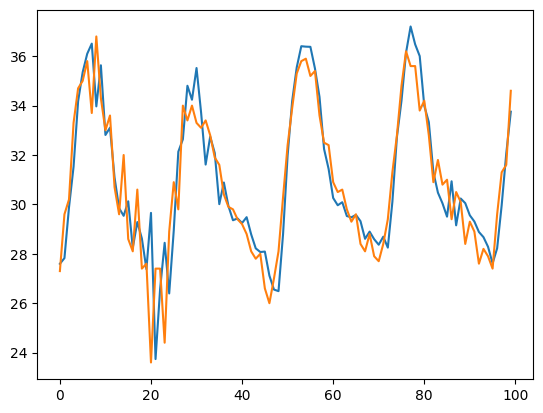

In [98]:
test_prdictions = model2.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Prediction': test_prdictions, 'Actuals': y_test})

print(test_results)
plt.plot(test_results['Test Prediction'][:100])
plt.plot(test_results['Actuals'][:100]) 
plt.show()

#MSE and PLot


In [106]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y ,start, end):
    #predictions = model.predict(X[start:end]).flatten()# Only predict on the first 100 samples
    predictions = model.predict(X).flatten() #predict all samples
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    
    plt.figure(figsize=(10, 5))
    plt.plot(df["Actuals"][start:end], label='True Values', color= 'blue', linestyle='dashed', marker='o')
    plt.plot(df["Predictions"][start:end], label='Predictions', color='red', marker='o')
    plt.title(f"Test Predictions vs Actuals")
    plt.xlabel('Time Steps')
    plt.ylabel('Temperature')
    plt.legend()
    plt.savefig('modelsave3.png')
    plt.show()

    return df, mse(y, predictions)

986/986 [==============================] - 14s 14ms/step


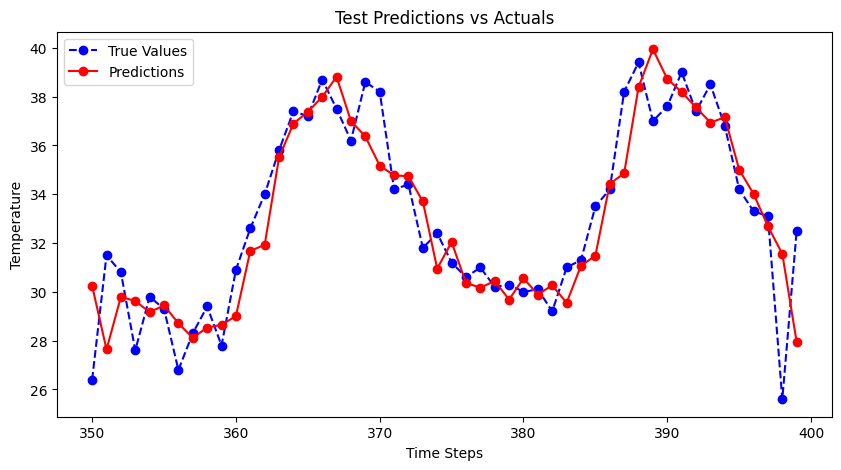

(       Predictions  Actuals
 0        27.017015     27.3
 1        27.379755     29.6
 2        29.556002     30.2
 3        31.338419     33.3
 4        34.101566     34.7
 ...            ...      ...
 31530    17.844496     17.0
 31531    16.776978     16.0
 31532    17.302904     18.0
 31533    16.796087     16.0
 31534    16.088968     16.0
 
 [31535 rows x 2 columns],
 1.3682927386702473)

In [108]:
modele = load_model('modellstm/')

plot_predictions1(modele, X_test, y_test, 350, 400)

986/986 [==============================] - 2s 2ms/step


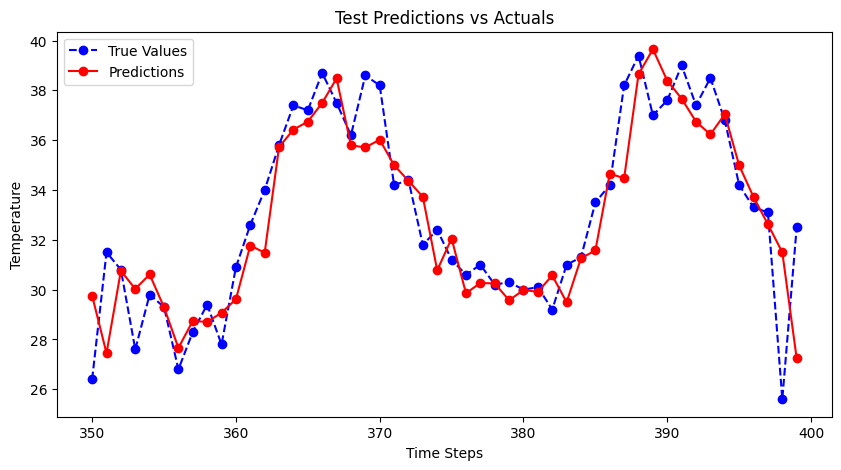

(       Predictions  Actuals
 0        27.457006     27.3
 1        27.508490     29.6
 2        29.672321     30.2
 3        30.858515     33.3
 4        33.777813     34.7
 ...            ...      ...
 31530    17.785416     17.0
 31531    16.684738     16.0
 31532    17.055937     18.0
 31533    17.683023     16.0
 31534    16.490578     16.0
 
 [31535 rows x 2 columns],
 1.4845702820984001)

In [110]:
modelc = load_model('convmodel/')

plot_predictions1(modelc, X_test, y_test, 350, 400)